In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from tqdm import tqdm

PUTNO 1

In [2]:
N=201
x=np.linspace(0,0.20,N)
y=np.linspace(0,0.20,N)
T=np.zeros((N,N))
def u(x,y):
    return np.exp(-x*y)
def f_ini(T):
    T[0,:]=10
    return T


h=x[1]-x[0]
h
f_ini(T)

array([[10., 10., 10., ..., 10., 10., 10.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [22]:
def Relajacion(T,Nit = int(1e3), omega = 0.5 ,tolerancia = 1e-3):
    
    itmax = 0
    
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                
                tmp = 0.25*( T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1] -h**2*u(i,j))
                
                # Matriz resta
                r = omega*(tmp - T[i,j])
                
                # Actualizo la matrix
                T[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
                    
        #print(np.round(T,2))
                
        
        if np.abs(dmax) < tolerancia:
            
            print(it)
            itmax = it
            break
            
    return T,itmax
        
        

In [23]:
T2,_=Relajacion(T)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [03:20<00:00,  4.98it/s]


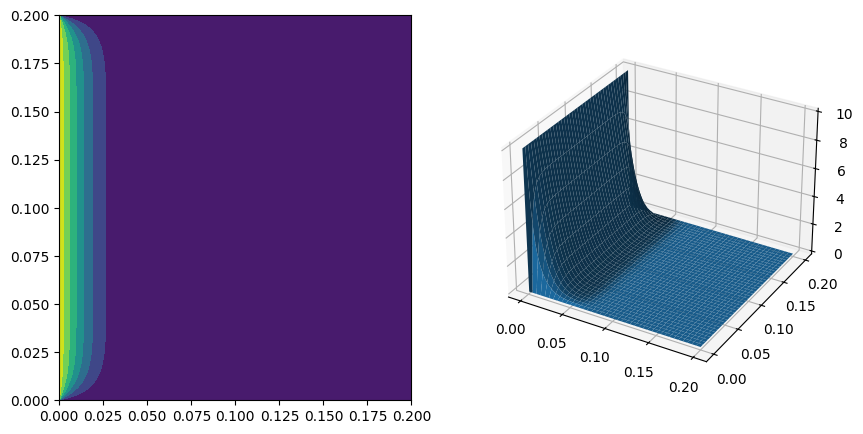

In [24]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122, projection='3d')

X,Y = np.meshgrid(x,y)

c = ax.contourf(X,Y,T2.T)

ax1.plot_surface(X,Y,T2.T)